In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### data from scraping webiste lazada, Katagori --> Peralatan Elektronik --> Handphone

In [212]:
df = pd.read_excel('Product_lazada_get_api.xlsx')
df.head(10)

,Seller,Brand,Name,Price,Location,Link
0,vivo,Vivo,"vivo iQOO Z7 (8/128) - SDM 782G, 120W FlashCha...",4299000,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-8128-...
1,vivo,Vivo,"vivo iQOO Z7 (12/256) - SDM 782G, 120W FlashCh...",4899000,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-12256...
2,vinz flash sale,itel,Itel P40 4/64 GARANSI RESMI,1098900,Kota Jakarta Utara,//www.lazada.co.id/products/itel-p40-464-garan...
3,Top 1 smart phone,No Brand,【Beli 1 Gratis 1】Produk hp Murah asli A57 7.5I...,899999,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-1pro...
4,Original Link,Infinix,Infinix Hot 30i 8/128 GB RAM 8 ROM 128 8GB 128...,1799000,Kota Jakarta Utara,//www.lazada.co.id/products/infinix-hot-30i-81...
5,Top 1 smart phone,No Brand,【FLASH SALE】 hp murah Reno9 Pro 5G 7.5Inci Pon...,1100000,Kota Jakarta Utara,//www.lazada.co.id/products/flash-sale-hp-mura...
6,36Shop,itel,"Itel P40 4GB+64GB Garansi Resmi, LAYAR Jenis I...",1299000,Kota Jakarta Barat,//www.lazada.co.id/products/itel-p40-4gb64gb-g...
7,BB Shop,itel,"Itel P40 4GB+64GB Garansi Resmi, LAYAR Jenis I...",1299000,Kota Jakarta Barat,//www.lazada.co.id/products/itel-p40-4gb64gb-g...
8,Mentari Cell,Xiaomi,XIAOMI REDMI NOTE 8 - 3GB/32GB - Chipset Qu...,1342569,Kab. Madiun,//www.lazada.co.id/products/xiaomi-redmi-note-...
9,Duniagadgetku,itel,ITEL P40 RAM (4GB/64GB) - GARANSI RESMI,1150000,Kota Jakarta Barat,//www.lazada.co.id/products/itel-p40-ram-4gb64...


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Seller    200 non-null    object
 1   Brand     200 non-null    object
 2   Name      200 non-null    object
 3   Price     200 non-null    int64 
 4   Location  200 non-null    object
 5   Link      200 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.5+ KB


### Cleaning Data

In [205]:
df_clean = df[(df['Seller'] == 'Smart Phone Sale') | (df['Seller'] == 'Top 1 smart phone')]
df_clean

,Seller,Brand,Name,Price,Location,Link
3,Top 1 smart phone,No Brand,【Beli 1 Gratis 1】Produk hp Murah asli A57 7.5I...,899999,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-1pro...
5,Top 1 smart phone,No Brand,【FLASH SALE】 hp murah Reno9 Pro 5G 7.5Inci Pon...,1100000,Kota Jakarta Utara,//www.lazada.co.id/products/flash-sale-hp-mura...
43,Top 1 smart phone,No Brand,【Beli 1 Gratis 1】Produk hp Murah asli A57 7.5I...,899999,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-1pro...
45,Top 1 smart phone,No Brand,【FLASH SALE】 hp murah Reno9 Pro 5G 7.5Inci Pon...,1100000,Kota Jakarta Utara,//www.lazada.co.id/products/flash-sale-hp-mura...
96,Smart Phone Sale,No Brand,【Beli 1 Gratis 6】HP Murah Galaxy S23 Ultra+ 5G...,1100000,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-6hp-...
103,Smart Phone Sale,No Brand,【Beli 1 Gratis 6】 hp murah Reno8Z Pro 5G 7.5In...,1100000,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-6-hp...
123,Top 1 smart phone,No Brand,【Beli 1 Gratis 1】Produk hp Murah asli A57 7.5I...,899999,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-1pro...
125,Top 1 smart phone,No Brand,【FLASH SALE】 hp murah Reno9 Pro 5G 7.5Inci Pon...,1100000,Kota Jakarta Utara,//www.lazada.co.id/products/flash-sale-hp-mura...
171,Smart Phone Sale,No Brand,【Beli 1 Gratis 6】HP Murah Galaxy S23 Ultra+ 5G...,1100000,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-6hp-...
176,Smart Phone Sale,No Brand,【Beli 1 Gratis 6】 hp murah Reno8Z Pro 5G 7.5In...,1100000,Kota Jakarta Utara,//www.lazada.co.id/products/beli-1-gratis-6-hp...


##### Karena kita sudah dapat data dari kolom 'Name' yang kurang jelas maka kita tidak akan menampilkan data tersebut pada 

In [215]:
df = df[(df['Seller'] != 'Smart Phone Sale') & (df['Seller'] != 'Top 1 smart phone')].reset_index(drop=True)
df

,Seller,Brand,Name,Price,Location,Link
0,vivo,Vivo,"vivo iQOO Z7 (8/128) - SDM 782G, 120W FlashCha...",4299000,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-8128-...
1,vivo,Vivo,"vivo iQOO Z7 (12/256) - SDM 782G, 120W FlashCh...",4899000,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-12256...
2,vinz flash sale,itel,Itel P40 4/64 GARANSI RESMI,1098900,Kota Jakarta Utara,//www.lazada.co.id/products/itel-p40-464-garan...
3,Original Link,Infinix,Infinix Hot 30i 8/128 GB RAM 8 ROM 128 8GB 128...,1799000,Kota Jakarta Utara,//www.lazada.co.id/products/infinix-hot-30i-81...
4,36Shop,itel,"Itel P40 4GB+64GB Garansi Resmi, LAYAR Jenis I...",1299000,Kota Jakarta Barat,//www.lazada.co.id/products/itel-p40-4gb64gb-g...
...,...,...,...,...,...,...
185,Murahmeriah shop online,Realme,Realme C55 ( 6/128 - 8/256 ) Garansi Resmi,2344000,Kota Jakarta Selatan,//www.lazada.co.id/products/realme-c55-6128-82...
186,Murahmeriah shop online,Samsung,Samsung Galaxy A54 ( 8/128 + 8/256 ) Garansi R...,5738000,Kota Jakarta Selatan,//www.lazada.co.id/products/samsung-galaxy-a54...
187,Murahmeriah shop online,Infinix,Infinix Hot 20s (8/128) Garansi Resmi,2388000,Kota Jakarta Selatan,//www.lazada.co.id/products/infinix-hot-20s-81...
188,Murahmeriah shop online,Samsung,Samsung Galaxy A34 ( 8/128 + 8/256 ) Garansi R...,4569000,Kota Jakarta Selatan,//www.lazada.co.id/products/samsung-galaxy-a34...


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Seller    190 non-null    object
 1   Brand     190 non-null    object
 2   Name      190 non-null    object
 3   Price     190 non-null    int64 
 4   Location  190 non-null    object
 5   Link      190 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.0+ KB


##### membersihkan data yang terdapat pada kolom 'Name'

In [217]:
df_cleaning_name = df['Name']
tanda = ['(', ')', '<', '>', '[', ']', '-', '+', '【', '】', ',']
for t in tanda:
    df_cleaning_name = df_cleaning_name.str.replace(t, '')

df_cleaning_name

0      vivo iQOO Z7 8/128  SDM 782G 120W FlashCharge ...
1      vivo iQOO Z7 12/256  SDM 782G 120W FlashCharge...
2                            Itel P40 4/64 GARANSI RESMI
3      Infinix Hot 30i 8/128 GB RAM 8 ROM 128 8GB 128...
4      Itel P40 4GB64GB Garansi Resmi LAYAR Jenis IPS...
                             ...                        
185              Realme C55  6/128  8/256  Garansi Resmi
186    Samsung Galaxy A54  8/128  8/256  Garansi Resm...
187                  Infinix Hot 20s 8/128 Garansi Resmi
188    Samsung Galaxy A34  8/128  8/256  Garansi Resm...
189    Samsung Galaxy a14 Lte/4G  4/128 / 6/128  Gara...
Name: Name, Length: 190, dtype: object

##### Melakukan split Kolom 'Name' untuk mengambil beberapa data saja untuk di tampilkan

In [218]:
df_split_name = df_cleaning_name.str.split(expand=True)
df_split_name.head(20)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,vivo,iQOO,Z7,8/128,SDM,782G,120W,FlashCharge,5000mAh,64MP,...,None,None,None,None,None,None,None,None,None,None
1,vivo,iQOO,Z7,12/256,SDM,782G,120W,FlashCharge,5000mAh,64MP,...,None,None,None,None,None,None,None,None,None,None
2,Itel,P40,4/64,GARANSI,RESMI,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Infinix,Hot,30i,8/128,GB,RAM,8,ROM,128,8GB,...,None,None,None,None,None,None,None,None,None,None
4,Itel,P40,4GB64GB,Garansi,Resmi,LAYAR,Jenis,IPS,LCD,Ukuran,...,Jenis,LiPo,Kapasitas,6000,mAh,None,None,None,None,None
5,Itel,P40,4GB64GB,Garansi,Resmi,LAYAR,Jenis,IPS,LCD,Ukuran,...,Jenis,LiPo,Kapasitas,6000,mAh,None,None,None,None,None
6,XIAOMI,REDMI,NOTE,8,3GB/32GB,Chipset,Qualcomm,SDM665,Snapdragon,665,...,None,None,None,None,None,None,None,None,None,None
7,ITEL,P40,RAM,4GB/64GB,GARANSI,RESMI,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,Realme,C55,6/128GB,Garansi,Resmi,Indonesia,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Infinix,Smart,7,3GB64GB,4GB64GB,Garansi,Resmi,Infinix,1,Tahun,...,camera,Single,5MP,Battery,Type,LiPo,5000,mAh,nonremovable,None


##### mengambil beberapa index dari kolom yang sudah di split

In [219]:
product_name = []
for index, row in df_split_name.iterrows():
    data = row[0]
    data1 = row[1]
    data2 = row[2]
    data3 = row[3] 
    if data3 == 'GARANSI' or data3 == 'Garansi' or data3 == 'garansi':
        data_concat = f'{data} {data1} {data2}'
        data_df = pd.DataFrame({'Product_Name' : [data_concat]})
        product_name.append(data_df)
    else:
        data_concat = f'{data} {data1} {data2} {data3}'
        data_df = pd.DataFrame({'Product_Name' : [data_concat]})
        product_name.append(data_df)

pd_concat = pd.concat(product_name).reset_index(drop=True)
pd_concat.head(20)

,Product_Name
0,vivo iQOO Z7 8/128
1,vivo iQOO Z7 12/256
2,Itel P40 4/64
3,Infinix Hot 30i 8/128
4,Itel P40 4GB64GB
5,Itel P40 4GB64GB
6,XIAOMI REDMI NOTE 8
7,ITEL P40 RAM 4GB/64GB
8,Realme C55 6/128GB
9,Infinix Smart 7 3GB64GB


In [221]:
df['Product_Name'] = pd_concat
df.head(20)

,Seller,Brand,Name,Price,Location,Link,Product_Name
0,vivo,Vivo,"vivo iQOO Z7 (8/128) - SDM 782G, 120W FlashCha...",4299000,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-8128-...,vivo iQOO Z7 8/128
1,vivo,Vivo,"vivo iQOO Z7 (12/256) - SDM 782G, 120W FlashCh...",4899000,Kab. Tangerang,//www.lazada.co.id/products/vivo-iqoo-z7-12256...,vivo iQOO Z7 12/256
2,vinz flash sale,itel,Itel P40 4/64 GARANSI RESMI,1098900,Kota Jakarta Utara,//www.lazada.co.id/products/itel-p40-464-garan...,Itel P40 4/64
3,Original Link,Infinix,Infinix Hot 30i 8/128 GB RAM 8 ROM 128 8GB 128...,1799000,Kota Jakarta Utara,//www.lazada.co.id/products/infinix-hot-30i-81...,Infinix Hot 30i 8/128
4,36Shop,itel,"Itel P40 4GB+64GB Garansi Resmi, LAYAR Jenis I...",1299000,Kota Jakarta Barat,//www.lazada.co.id/products/itel-p40-4gb64gb-g...,Itel P40 4GB64GB
5,BB Shop,itel,"Itel P40 4GB+64GB Garansi Resmi, LAYAR Jenis I...",1299000,Kota Jakarta Barat,//www.lazada.co.id/products/itel-p40-4gb64gb-g...,Itel P40 4GB64GB
6,Mentari Cell,Xiaomi,XIAOMI REDMI NOTE 8 - 3GB/32GB - Chipset Qu...,1342569,Kab. Madiun,//www.lazada.co.id/products/xiaomi-redmi-note-...,XIAOMI REDMI NOTE 8
7,Duniagadgetku,itel,ITEL P40 RAM (4GB/64GB) - GARANSI RESMI,1150000,Kota Jakarta Barat,//www.lazada.co.id/products/itel-p40-ram-4gb64...,ITEL P40 RAM 4GB/64GB
8,Apollo Gadget Store,Realme,Realme C55 6/128GB Garansi Resmi Indonesia,2499000,Kota Surabaya,//www.lazada.co.id/products/realme-c55-6128gb-...,Realme C55 6/128GB
9,36Shop,Infinix,Infinix Smart 7 [3GB+64GB] [4GB+64GB] Garansi ...,1209000,Kota Jakarta Barat,//www.lazada.co.id/products/infinix-smart-7-3g...,Infinix Smart 7 3GB64GB


### Brand HP yang banyak dijual di lazada

In [222]:
df_seller = df[['Seller', 'Brand']].groupby(by=['Brand']).count().reset_index()

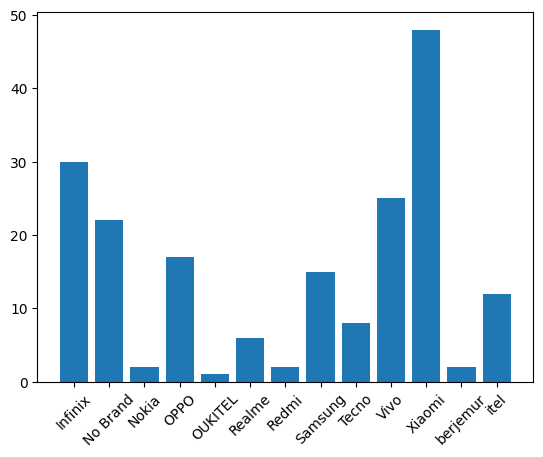

In [223]:
plt.bar(df_seller['Brand'], df_seller['Seller'])
plt.xticks(rotation=45)
plt.show()

##### Dapat dilihat bahwa brand terbanyak yang dijual di applikasi lazada pada halama 1 - 5 yatu Brand Xiomi

### Kota yang banyak penjual product HP

In [224]:
df_location = df[['Seller', 'Location']].groupby(by=['Location']).count().reset_index().sort_values("Seller",ascending=True)
df_location

,Location,Seller
0,Kab. Bekasi,1
10,Kota Madiun,1
12,Kota Tasikmalaya,1
9,Kota Kediri,6
4,Kota Depok,7
2,Kab. Tangerang,10
3,Kota Bandung,12
13,Luar Negeri,13
6,Kota Jakarta Pusat,18
11,Kota Surabaya,18


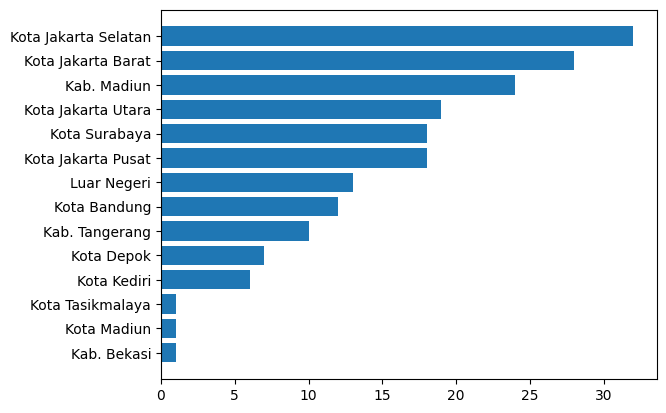

In [225]:
plt.barh(df_location['Location'], df_location['Seller'])
plt.show()

##### Dari total 190 penjual pada applikasi lazada, paling banyak penjual dari daerah Jakarta Selatan, dan selanjutnya daerah Jakarta Barat


### Penjual menjual berapa brand HP, dan banyaknya product brand HP tersebut


In [234]:
df_seller = df[['Seller', 'Brand', 'Name']].groupby(by=['Seller', 'Brand']).size().reset_index(name='count').sort_values("Seller",ascending=True)
df_seller.head(20)

,Seller,Brand,count
0,36Shop,Infinix,3
1,36Shop,itel,3
2,Apollo Gadget Store,Realme,1
3,Aurora888,Redmi,2
4,Aurora888,Vivo,2
5,BB Shop,Xiaomi,3
6,BB Shop,itel,3
7,Bandarhpmurah,Infinix,3
8,Captain Gadget Store,OPPO,1
9,Cv.Garden Cell,Xiaomi,6


### Maximum, Minimum, and Average Prices

In [227]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
price_avg = df[['Brand','Price']].groupby(by=['Brand']).mean()
price_avg


,Price
Brand,
Infinix,1526690.233
No Brand,1171818.182
Nokia,1324000.000
OPPO,3155465.529
OUKITEL,4847507.000
Realme,2526633.333
Redmi,980000.000
Samsung,3345063.133
Tecno,2476750.000


In [228]:
price_max = df[['Brand','Price']].groupby(by=['Brand']).max()
price_max

,Price
Brand,
Infinix,3469000
No Brand,2639000
Nokia,1324000
OPPO,5990000
OUKITEL,4847507
Realme,2998000
Redmi,980000
Samsung,6088000
Tecno,2989000


In [229]:
price_min = df[['Brand','Price']].groupby(by=['Brand']).min()
price_min

,Price
Brand,
Infinix,1175000
No Brand,155000
Nokia,1324000
OPPO,1095000
OUKITEL,4847507
Realme,1999000
Redmi,980000
Samsung,1266000
Tecno,1298000


In [230]:
all_price = pd.merge(pd.merge(price_max, price_min, on='Brand'), price_avg, on='Brand')
new_name_kolom = {'Price_x' : 'Price_max', 'Price_y' : 'Price_min', 'Price' : 'Price_avg'}
all_price = all_price.rename(columns=new_name_kolom).reset_index()
all_price

,Brand,Price_max,Price_min,Price_avg
0,Infinix,3469000,1175000,1526690.233
1,No Brand,2639000,155000,1171818.182
2,Nokia,1324000,1324000,1324000.000
3,OPPO,5990000,1095000,3155465.529
4,OUKITEL,4847507,4847507,4847507.000
5,Realme,2998000,1999000,2526633.333
6,Redmi,980000,980000,980000.000
7,Samsung,6088000,1266000,3345063.133
8,Tecno,2989000,1298000,2476750.000
9,Vivo,5730000,519000,3201925.520


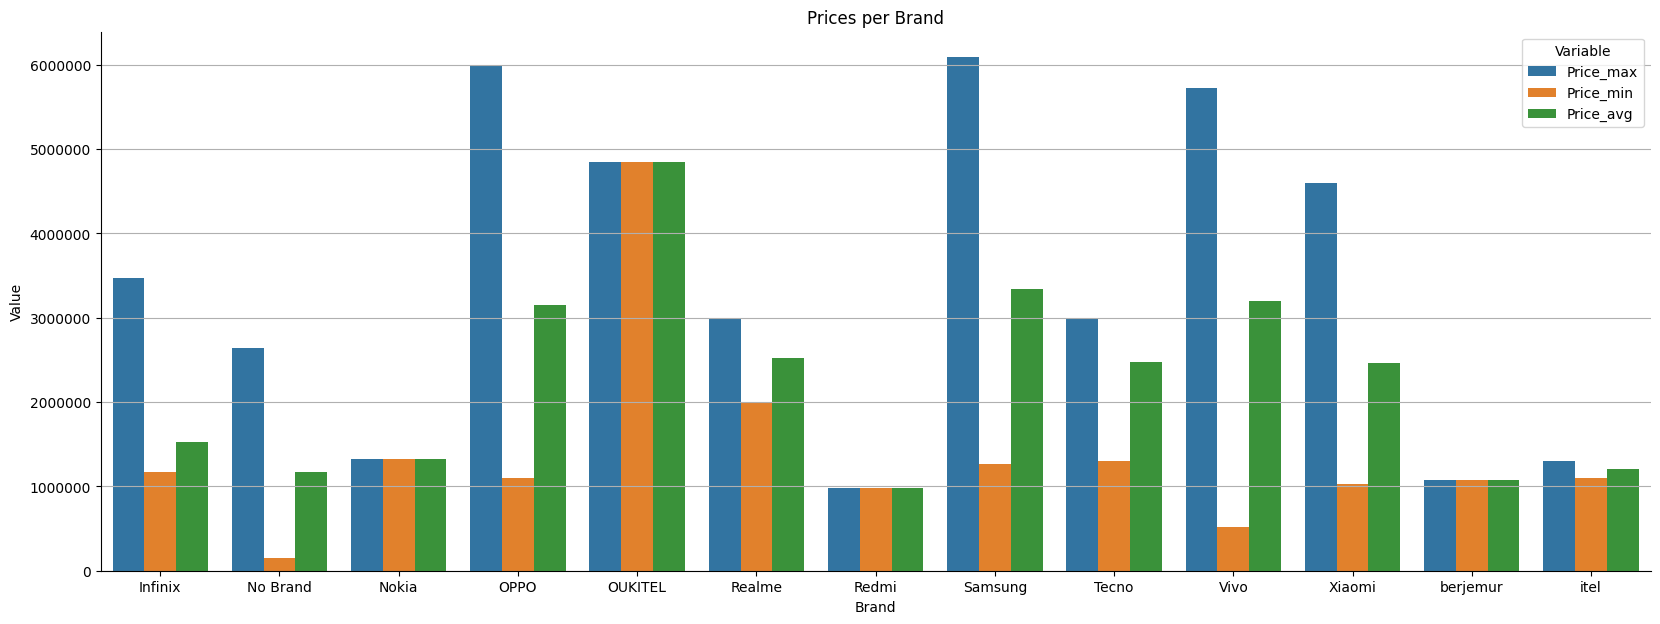

In [238]:
fig, ax1 = plt.subplots(figsize=(20, 7))
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
tidy = all_price.melt(id_vars='Brand').rename(columns=str.title)
sns.barplot(x='Brand', y='Value', hue='Variable', data=tidy, ax=ax1)
plt.title('Prices per Brand')
sns.despine(fig)

Berdasrkan chart di atas dapat dilihat bahwa harga HP termahal yang sudah dan hampir menyentuh nominal Rp 6.000.000 teridir dari Brand yang umum yaitu
1. Samssung
2. Oppo
3. Vivo

Sedangkan untuk harga hp terumah yang mendekati Rp 1.000.000 ataupun di bawah harga tersebut yitu
1. No Brand
2. Vivo
3. Redmi

Lalu untuk brand hp dengan harga setandar atau rata-rata dengan nominal harga mulai dari Rp 2.000.000 hingga Rp 4.000.000 (mulai dari yang paling mahal)
1. Oukitel
2. Samsung
3. Vivo
4. Oppo

tapi yang cukup menarik adalah hp denga harga rata - rata dari brand yang ternama seperti Samsung, Vivo, Oppo dengan mengeluarkan nominal yang kurang lebih sama kita dapat membeli hp yang "Termahal" dari brand seperti Infinix, Techno, dan Realme, sehingga kita dapat melakaukan perbanding lebih lanjut mengenai spesifikasi dan juga harga yang harus di keluarkan (price to performence)

### AVG Harga HP Termahal, AVG Harga HP Termurah, AVG Harga HP Standar / Rata - Rata


In [232]:
all_price_mean = all_price[['Price_max','Price_min','Price_avg']].mean()
all_price_mean

Price_max   3386731.308
Price_min   1374190.462
Price_avg   2254000.408
dtype: float64

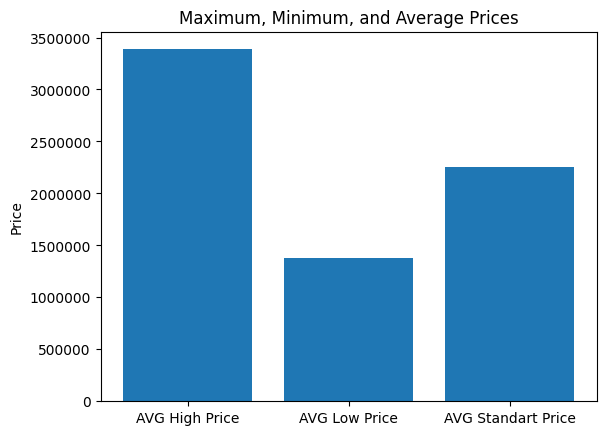

In [233]:
avg_all_price = {'Variable': ['AVG High Price', 'AVG Low Price', 'AVG Standart Price'],
            'Value': all_price_mean}
dt_vis_data = pd.DataFrame(avg_all_price)

# membuat bar plot
plt.ticklabel_format(style='plain', axis='y')
plt.bar(dt_vis_data['Variable'], dt_vis_data['Value'])
plt.ylabel('Price')
plt.title('Maximum, Minimum, and Average Prices')
plt.show()